# face Recognition with resnet-50
### team member :
    ### mohamed hossam abd elrahem 2020030064
    ### mohamed salah ibrahem 2020030069
    ### mostafa sayed ahmed 2020030081
    ### moamen ihab 2020030082
    ### omar youssef saker 2020030107
    ### amged matwally 2020030129
    ### abd el-rahman adel 2020030039
    ### mahmoud ahmed abdeen 2020030073
    ### islam ashraf 2020030013
    ### omar sayed 2020030047

In [34]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np 

In [35]:
width = 224
length  =224
batch_size = 64
epoch = 10
fill_mode_names = ['nearest' , 'wrap','reflect' ]

In [36]:
train_deg = ImageDataGenerator(
    rotation_range=30,
    shear_range=0.25,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode=fill_mode_names[0],
    rescale=1./255.,
)
train_dir="C:/Users/mhd_gamer/Downloads/FACE DATASET/Train"
train_data = train_deg.flow_from_directory(
    train_dir ,
    target_size=(width ,length) ,
    class_mode='categorical' ,
    batch_size=batch_size ,
    shuffle=True,
    
)


Found 2190 images belonging to 31 classes.


In [37]:
classes=list(train_data.class_indices.keys())
classes

['Akshay Kumar',
 'Alexandra Daddario',
 'Alia Bhatt',
 'Amitabh Bachchan',
 'Andy Samberg',
 'Anushka Sharma',
 'Billie Eilish',
 'Brad Pitt',
 'Camila Cabello',
 'Charlize Theron',
 'Claire Holt',
 'Courtney Cox',
 'Dwayne Johnson',
 'Elizabeth Olsen',
 'Ellen Degeneres',
 'Henry Cavill',
 'Hrithik Roshan',
 'Hugh Jackman',
 'Jessica Alba',
 'Kashyap',
 'Lisa Kudrow',
 'Margot Robbie',
 'Marmik',
 'Natalie Portman',
 'Priyanka Chopra',
 'Robert Downey Jr',
 'Roger Federer',
 'Tom Cruise',
 'Vijay Deverakonda',
 'Virat Kohli',
 'Zac Efron']

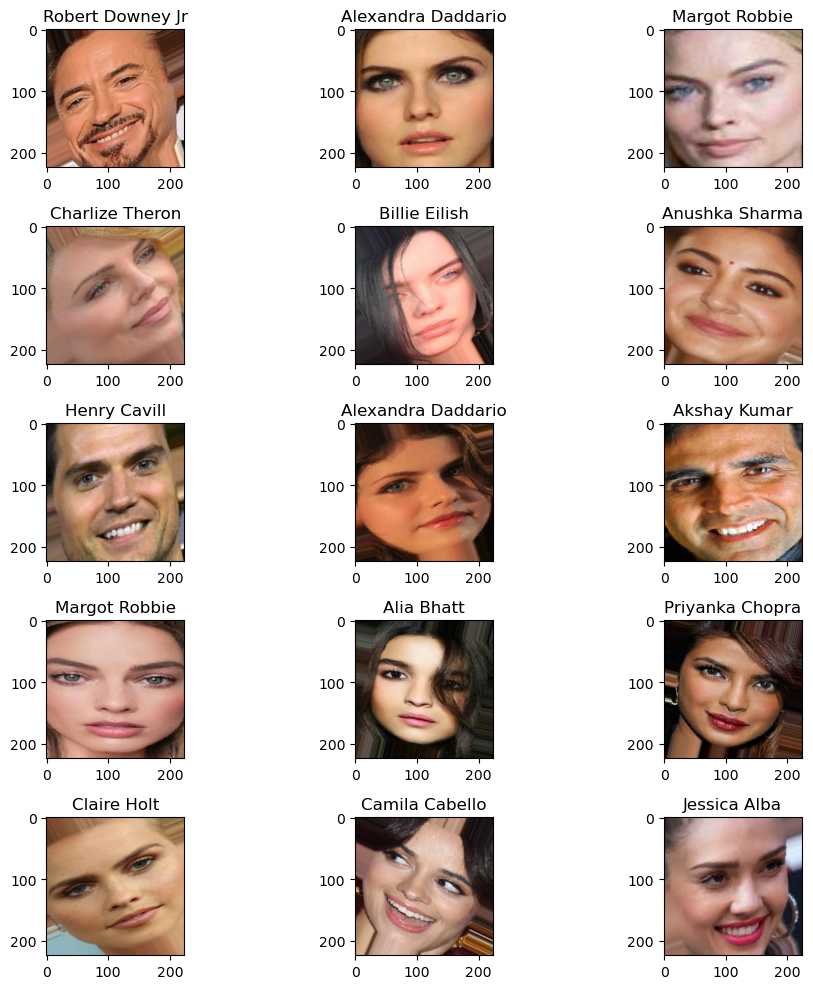

In [38]:
#figure some pics
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_data:
        image = X_batch[0]
        plt.title(classes[np.argmax(Y_batch[0])])
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [39]:
from keras.applications import ResNetRS50
from keras.models import Model
from keras.layers import Dropout , Dense , GlobalAveragePooling2D ,BatchNormalization
from keras.optimizers import Adam

input_shape = (width, length, 3)
num_classes = len(classes)

In [40]:
resnet_model = ResNetRS50(weights='imagenet' , include_top = False , input_shape= input_shape)
x = resnet_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512 , activation = 'relu')(x)
x = BatchNormalization()(x)
predictions = Dense(num_classes , activation='softmax')(x)
# Create the model
model = Model(inputs=resnet_model.input, outputs=predictions)
for layer in model.layers:
 layer.trainable = True
# Compile the model
model.compile(optimizer='adam' , loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 224, 224, 3)          0         ['input_4[0][0]']             
                                                                                                  
 normalization_2 (Normaliza  (None, 224, 224, 3)          0         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 zero_padding2d_10 (ZeroPad  (None, 226, 226, 3)          0         ['normalization_2[0][0]'

 BlockGroup2__block_0__se_s  (None, 1, 1, 256)            0         ['BlockGroup2__block_0__se_se_
 e_reshape (Reshape)                                                squeeze[0][0]']               
                                                                                                  
 BlockGroup2__block_0__se_s  (None, 1, 1, 64)             16448     ['BlockGroup2__block_0__se_se_
 e_reduce (Conv2D)                                                  reshape[0][0]']               
                                                                                                  
 BlockGroup2__block_0__se_s  (None, 1, 1, 256)            16640     ['BlockGroup2__block_0__se_se_
 e_expand (Conv2D)                                                  reduce[0][0]']                
                                                                                                  
 BlockGroup2__block_0__proj  (None, 56, 56, 256)          16384     ['stem_3_stem_act_4[0][0]']   
 ection_co

 _1 (Conv2D)                                                        _act[0][0]']                  
                                                                                                  
 BlockGroup2__block_2_batch  (None, 56, 56, 64)           256       ['BlockGroup2__block_2__conv_1
 _norm_1 (BatchNormalizatio                                         [0][0]']                      
 n)                                                                                               
                                                                                                  
 BlockGroup2__block_2__act_  (None, 56, 56, 64)           0         ['BlockGroup2__block_2_batch_n
 1 (Activation)                                                     orm_1[0][0]']                 
                                                                                                  
 BlockGroup2__block_2__conv  (None, 56, 56, 64)           36864     ['BlockGroup2__block_2__act_1[
 _2 (Conv2

 e_squeeze (GlobalAveragePo                                         norm_3[0][0]']                
 oling2D)                                                                                         
                                                                                                  
 BlockGroup3__block_0__se_s  (None, 1, 1, 512)            0         ['BlockGroup3__block_0__se_se_
 e_reshape (Reshape)                                                squeeze[0][0]']               
                                                                                                  
 BlockGroup3__block_0__se_s  (None, 1, 1, 128)            65664     ['BlockGroup3__block_0__se_se_
 e_reduce (Conv2D)                                                  reshape[0][0]']               
                                                                                                  
 BlockGroup3__block_0__proj  (None, 28, 28, 256)          0         ['BlockGroup2__block_2__output
 ection_po

                                                                     'BlockGroup3__block_0__output
                                                                    _act[0][0]']                  
                                                                                                  
 BlockGroup3__block_1__outp  (None, 28, 28, 512)          0         ['add_36[0][0]']              
 ut_act (Activation)                                                                              
                                                                                                  
 BlockGroup3__block_2__conv  (None, 28, 28, 128)          65536     ['BlockGroup3__block_1__output
 _1 (Conv2D)                                                        _act[0][0]']                  
                                                                                                  
 BlockGroup3__block_2_batch  (None, 28, 28, 128)          512       ['BlockGroup3__block_2__conv_1
 _norm_1 (

 h_norm_3 (BatchNormalizati                                         [0][0]']                      
 on)                                                                                              
                                                                                                  
 BlockGroup3__block_3__se_s  (None, 512)                  0         ['BlockGroup3__block_3__batch_
 e_squeeze (GlobalAveragePo                                         norm_3[0][0]']                
 oling2D)                                                                                         
                                                                                                  
 BlockGroup3__block_3__se_s  (None, 1, 1, 512)            0         ['BlockGroup3__block_3__se_se_
 e_reshape (Reshape)                                                squeeze[0][0]']               
                                                                                                  
 BlockGrou

                                                                                                  
 BlockGroup4__block_0__proj  (None, 14, 14, 1024)         4096      ['BlockGroup4__block_0__projec
 ection_batch_norm (BatchNo                                         tion_conv[0][0]']             
 rmalization)                                                                                     
                                                                                                  
 add_39 (Add)                (None, 14, 14, 1024)         0         ['BlockGroup4__block_0__se_se_
                                                                    excite[0][0]',                
                                                                     'BlockGroup4__block_0__projec
                                                                    tion_batch_norm[0][0]']       
                                                                                                  
 BlockGrou

 BlockGroup4__block_2__act_  (None, 14, 14, 256)          0         ['BlockGroup4__block_2__batch_
 2 (Activation)                                                     norm_2[0][0]']                
                                                                                                  
 BlockGroup4__block_2__conv  (None, 14, 14, 1024)         262144    ['BlockGroup4__block_2__act_2[
 _3 (Conv2D)                                                        0][0]']                       
                                                                                                  
 BlockGroup4__block_2__batc  (None, 14, 14, 1024)         4096      ['BlockGroup4__block_2__conv_3
 h_norm_3 (BatchNormalizati                                         [0][0]']                      
 on)                                                                                              
                                                                                                  
 BlockGrou

                                                                     'BlockGroup4__block_2__output
                                                                    _act[0][0]']                  
                                                                                                  
 BlockGroup4__block_3__outp  (None, 14, 14, 1024)         0         ['add_42[0][0]']              
 ut_act (Activation)                                                                              
                                                                                                  
 BlockGroup4__block_4__conv  (None, 14, 14, 256)          262144    ['BlockGroup4__block_3__output
 _1 (Conv2D)                                                        _act[0][0]']                  
                                                                                                  
 BlockGroup4__block_4_batch  (None, 14, 14, 256)          1024      ['BlockGroup4__block_4__conv_1
 _norm_1 (

 h_norm_3 (BatchNormalizati                                         [0][0]']                      
 on)                                                                                              
                                                                                                  
 BlockGroup4__block_5__se_s  (None, 1024)                 0         ['BlockGroup4__block_5__batch_
 e_squeeze (GlobalAveragePo                                         norm_3[0][0]']                
 oling2D)                                                                                         
                                                                                                  
 BlockGroup4__block_5__se_s  (None, 1, 1, 1024)           0         ['BlockGroup4__block_5__se_se_
 e_reshape (Reshape)                                                squeeze[0][0]']               
                                                                                                  
 BlockGrou

                                                                                                  
 BlockGroup5__block_0__proj  (None, 7, 7, 2048)           8192      ['BlockGroup5__block_0__projec
 ection_batch_norm (BatchNo                                         tion_conv[0][0]']             
 rmalization)                                                                                     
                                                                                                  
 add_45 (Add)                (None, 7, 7, 2048)           0         ['BlockGroup5__block_0__se_se_
                                                                    excite[0][0]',                
                                                                     'BlockGroup5__block_0__projec
                                                                    tion_batch_norm[0][0]']       
                                                                                                  
 BlockGrou

 BlockGroup5__block_2__act_  (None, 7, 7, 512)            0         ['BlockGroup5__block_2__batch_
 2 (Activation)                                                     norm_2[0][0]']                
                                                                                                  
 BlockGroup5__block_2__conv  (None, 7, 7, 2048)           1048576   ['BlockGroup5__block_2__act_2[
 _3 (Conv2D)                                                        0][0]']                       
                                                                                                  
 BlockGroup5__block_2__batc  (None, 7, 7, 2048)           8192      ['BlockGroup5__block_2__conv_3
 h_norm_3 (BatchNormalizati                                         [0][0]']                      
 on)                                                                                              
                                                                                                  
 BlockGrou

In [41]:
# Train the model
from keras.callbacks import EarlyStopping , LearningRateScheduler
# Learning rate scheduler
def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    elif epoch < 15:
        return 0.0001
    else:
        return 0.0001

# Create a learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)


callback = [lr_scheduler]


In [42]:
history = model.fit(train_data,
                  batch_size=batch_size,
                  epochs=epoch,
                  callbacks=callback ,
                  shuffle=True ,
                 )

Epoch 1/10
35/35 [==============================] - 343s 9s/step - loss: 2.6510 - accuracy: 0.2726 - lr: 0.0010
Epoch 2/10
35/35 [==============================] - 307s 9s/step - loss: 1.2249 - accuracy: 0.6228 - lr: 0.0010
Epoch 3/10
35/35 [==============================] - 296s 8s/step - loss: 0.7296 - accuracy: 0.7680 - lr: 0.0010
Epoch 4/10
35/35 [==============================] - 295s 8s/step - loss: 0.3542 - accuracy: 0.8950 - lr: 0.0010
Epoch 5/10
35/35 [==============================] - 297s 8s/step - loss: 0.2187 - accuracy: 0.9356 - lr: 0.0010
Epoch 6/10
35/35 [==============================] - 294s 8s/step - loss: 0.1363 - accuracy: 0.9626 - lr: 0.0010
Epoch 7/10
35/35 [==============================] - 298s 9s/step - loss: 0.1545 - accuracy: 0.9575 - lr: 0.0010
Epoch 8/10
35/35 [==============================] - 314s 9s/step - loss: 0.1083 - accuracy: 0.9694 - lr: 0.0010
Epoch 9/10
35/35 [==============================] - 314s 9s/step - loss: 0.0722 - accuracy: 0.9813 - lr:

In [43]:
valid_dir = "C:/Users/mhd_gamer/Downloads/FACE DATASET/Faces/test"
valid = ImageDataGenerator(rescale=1./255.)
#############
valid_ds = valid.flow_from_directory(valid_dir,target_size=(width, length),batch_size=batch_size,
                                        class_mode='categorical',
                                         shuffle=True,
                                        )

model.evaluate(valid_ds)

Found 372 images belonging to 31 classes.
6/6 [==============================] - 13s 2s/step - loss: 0.5743 - accuracy: 0.8145


[0.5742613077163696, 0.8145161271095276]

1/1 [==============================] - 1s 1s/step
Actual:Alexandra Daddario


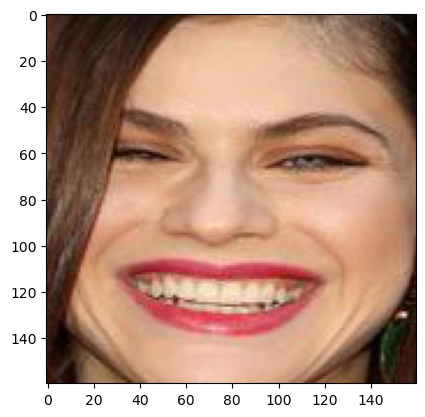

Predicted:  Alexandra Daddario


In [44]:
from PIL import Image as image1
from skimage import transform
img= "C:/Users/mhd_gamer/Downloads/FACE DATASET/Faces/test/Alexandra Daddario/Alexandra Daddario_0.jpg" 
img = image1.open(img) 
np_img = np.array(img).astype('float32')/255
np_img = transform.resize(np_img , (224,224,3))
np_img = np.expand_dims(np_img, axis=0)
y_pred = model.predict(np_img) 
print("Actual:Alexandra Daddario")
plt.imshow(img) 
plt.show()
print("Predicted: ",classes[np.argmax(y_pred)])


1/1 [==============================] - 0s 90ms/step
Actual:Tom 


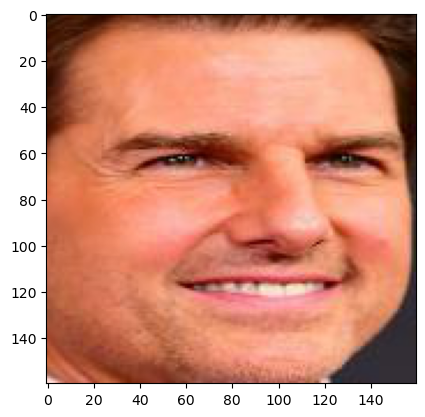

Predicted:  Tom Cruise


In [45]:
img= "C:/Users/mhd_gamer/Downloads/FACE DATASET/Faces/test/Tom Cruise/Tom Cruise_0.jpg" 
img = image1.open(img) 
np_img = np.array(img).astype('float32')/255
np_img = transform.resize(np_img , (224,224,3))
np_img = np.expand_dims(np_img, axis=0)
y_pred = model.predict(np_img) 
print("Actual:Tom ")
plt.imshow(img) 
plt.show()
print("Predicted: ",classes[np.argmax(y_pred)])